# Regularized Linear Regression (Diabetes Dataset)

## What is Regularization and what does it achieve?

- A standard model tends to have some variance in it, which translates to the model not being able to generalize well for a data set different than its training data. 

- Regularization, significantly reduces the variance of the model, without a substantial increase in its bias. 

So the tuning parameter $\lambda$, used in the regularization techniques described below, controls the impact on bias and variance. As the value of  $\lambda$ rises, it reduces the value of coefficients and thus reducing the variance. Til a point, this increase in $\lambda$ is beneficial as it is only reducing the variance (hence avoiding overfitting), without loosing any important properties in the data. But after certain value, the model starts loosing important properties, giving rise to bias in the model and thus underfitting. Therefore, the value of  $\lambda$ should be carefully selected.

## Types of Regularization

We will introduce vector norms, which refer to the different ways the magnitude of a vector can measured.

Let's say, for example, we are working with a linear regression problem. This problem has two parameters: $\beta_0$ (the intercept), and $\beta_1$. Let's assign the value of 1 to both of these parameters. Thevalues of these parameters are within a 2-dimensional vector, $\beta$

$\vec{\beta} = [\beta_0 \text{ }\beta_1] = [1 \text{ }1]$

### L1 norm  

To find the L1 norm of an n-dimensional vector, we sum the absolute values of all the vector parameters as follows:

$||\vec{\beta}||_1 = |\beta_0| + |\beta_1| + ... + |\beta_n|$

So the L1 norm of the our 2-dimensional parameters vector $\beta$ above, with the values 1 for the two parameters $\beta_0$ and $\beta_1$, is the following

$||\vec{\beta}||_1 = |\beta_0| + |\beta_1| = |1| + |1| = 2$

- L1 norm is also known as Manhattan norm

### L2 norm 

To find the L2 norm of the above n-dimensional vector, we use the following equation:

$||\vec{\beta}||_2 = \sqrt{\beta_0^2 + \beta_1^2 + ... + \beta_n^2}$

So the L2 norm of our 2-dimensional parameters vector $\beta$ above, which includes a parameter value of 1 for both $\beta_0 \text{ and } \beta_1$, is the following

$||\vec{\beta}||_2 = \sqrt{\beta_0^2 + \beta_1^2} = \sqrt{1^2 + 1^2} = \sqrt{2}$

Regularization is a technique used to reduce overfitting. In order words, in a low bias situation, where the model overfits to the training data, variance will be high (due to the bias-variance tradeoff), as the model will not generalize well to unseen data. Regularization techniques, such as L1 and L2 regularization, will reduce model complexity, and as a result, reduce overfitting.

For example, in ordinary linear regression, the goal is to minimize the variance.

$\text{min}_{\vec{\beta}} || \vec{y} - A \vec{\beta} ||_2^2$

In regularized regression, an additional term added to the function as a penalty or constraint. 

### Lasso Regression

Lasso→ $\text{min}_{\vec{\beta}} || \vec{y} - A \vec{\beta} ||_2^2 + \lambda || \vec{\beta}||_1$

In L1 regression, also known as lasso regression, the constraint is that we want the L1 norm of the parameters vector, which includes our parameters, to be at or below a specific value. In other words, we want to minimize the cost function, as long as the L1 norm is below a certain value.

### Ridge Regression

Ridge → $\text{min}_{\vec{\beta}} || \vec{y} - A \vec{\beta} ||_2^2 + \lambda || \vec{\beta}||_2^2$

And in L2 regularization, we want the L2 norm of our parameters vector to be constrained at or below a certain value.

![](assets/lab_assets/l1_l2_norm.png)


Plotting all the vectors of a specific L1 regularization value gives us a diamond. Therefore, the values of our parameters must be on or within this diamond. And in L2 regularization, the parameters vector must be on or within the circle.


In [18]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [71]:
number_examples=200
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

# chooose paths
alphas = np.logspace(-5, 5, 10)

## Ridge Regression

In [72]:
# set ridge regression model
ridge=linear_model.Ridge()

n_samples_train = 100
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]
train_errors_ridge = list()
test_errors_ridge = list()

# initialize coefficients 
coefs_ridge = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    train_errors_ridge.append(ridge.score(X_train, y_train))
    test_errors_ridge.append(ridge.score(X_test, y_test))

Text(0.5, 1.0, 'Ridge')

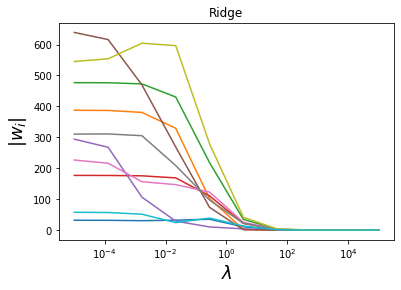

In [73]:
plt.semilogx(alphas, np.abs(coefs_ridge))
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('$|w_i|$',fontsize=18)
plt.title('Ridge')

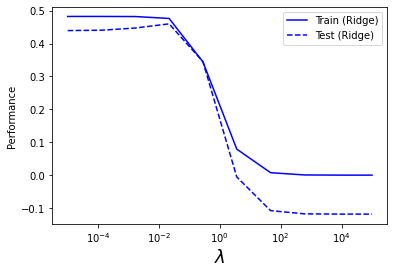

In [74]:
plt.semilogx(alphas, train_errors_ridge, 'b',label='Train (Ridge)')
plt.semilogx(alphas, test_errors_ridge, '--b',label='Test (Ridge)')
plt.legend(loc='upper right')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
plt.show()

## Lasso Regression

In [75]:
# set lasso regression model
lasso = linear_model.Lasso()

n_samples_train = 100
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]
train_errors_lasso = list()
test_errors_lasso = list()

# initialize coefficients 
coefs_lasso=[]
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    train_errors_lasso.append(lasso.score(X_train, y_train))
    test_errors_lasso.append(lasso.score(X_test, y_test))

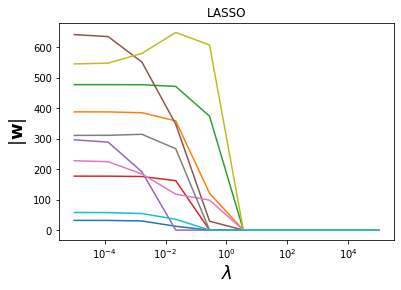

In [76]:
plt.semilogx(alphas, np.abs(coefs_lasso))
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('$|\mathbf{w}|$',fontsize=18)
plt.title('LASSO')
plt.show()

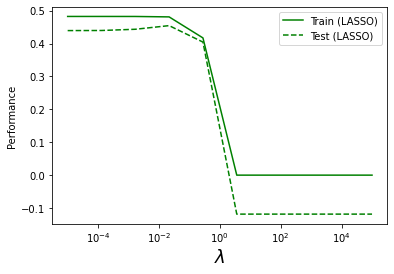

In [77]:
plt.semilogx(alphas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(alphas, test_errors_lasso, '--g',label='Test (LASSO)')
plt.legend(loc='upper right')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
plt.show()

## References

[L1 and L2 Norms and Regularization](https://pub.towardsai.net/l1-and-l2-norms-and-regularization-c50353e6423)

[Regularization in Machine Learning](https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a)

[Regularization Regression](https://www.statisticshowto.com/regularized-regression/)

[Linear Regression (Diabetes)](https://physics.bu.edu/~pankajm/ML-Notebooks/HTML/NB3_CVI-linreg_diabetes.html)